# Analisis exploratorio de datos

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

## Cargado de datos

In [7]:
df_url='https://docs.google.com/spreadsheets/d/1NJiaIRABEh1mJrqzP6bAYBkhBruBwUUzplHdXViv9-g/export?format=csv'
df=pd.read_csv(df_url)

## Funciones

In [30]:
def Summary(data, sheet):
    print(f"Hoja: {sheet}")

    # Crear la tabla de resumen
    resumen = {
        "Cantidad de filas": data.shape[0],
        "Cantidad de columnas": data.shape[1],
        "Datos faltantes": data.isnull().sum().sum(),
        "Filas duplicadas": data.duplicated().sum()
    }

    # Convertir el resumen en un DataFrame
    ResumenHoja = pd.DataFrame(resumen, index=["Resumen"])
    print("\nResumen:")
    display(ResumenHoja)

    print("\nEncabezado:")
    display(data.head())

## Analisis exploratorio de datos

In [9]:
Summary(df,'Datos pacientes')

Hoja: Datos pacientes

Resumen:


,Cantidad de filas,Cantidad de columnas,Datos faltantes,Filas duplicadas
Resumen,212691,17,0,0



Encabezado:


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [11]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


se realiza una tabla de frecuencias y un grafico de barras para la variable respuesta

In [12]:
df.Thyroid_Cancer_Risk.value_counts()

Thyroid_Cancer_Risk
Low       108388
Medium     72400
High       31903
Name: count, dtype: int64

In [13]:
sns.set_style("whitegrid")

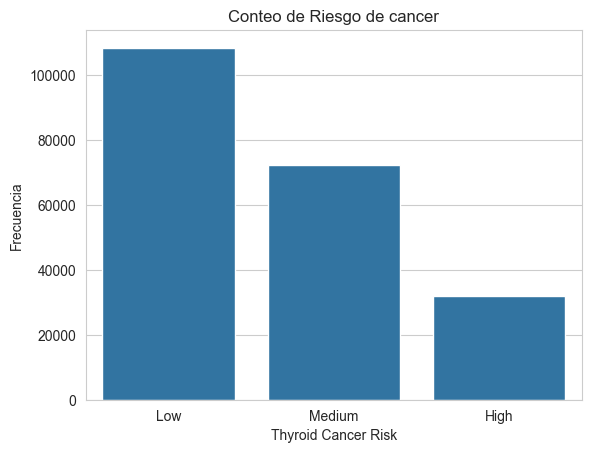

In [14]:
plt.title('Conteo de Riesgo de cancer')
sns.countplot(x=df.Thyroid_Cancer_Risk)
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Frecuencia')
plt.show()

podemos observar que el dataset esta desbalanceado, tomaremos en cuenta esto mas adelante

realizaremos graficas de cada variable del dataset

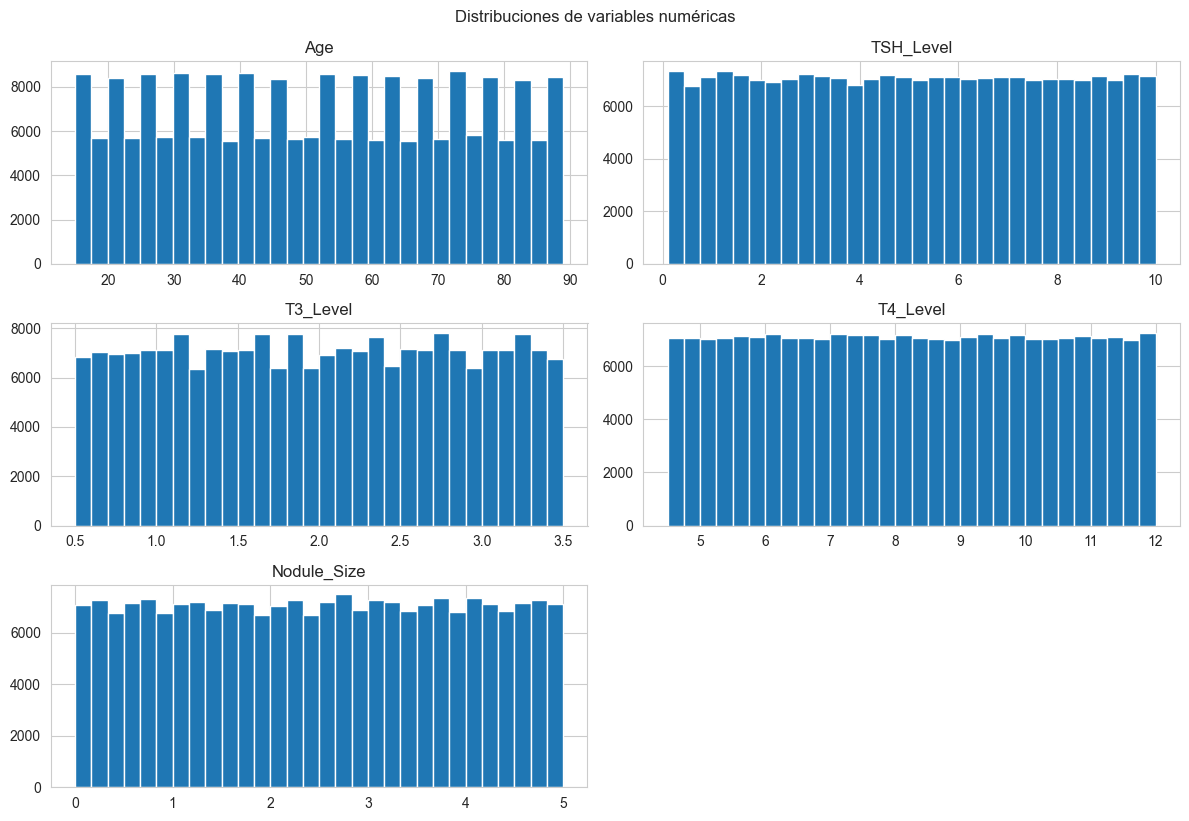

In [15]:
numericas = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
df[numericas].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.suptitle('Distribuciones de variables numéricas', y=1.02)
plt.show()

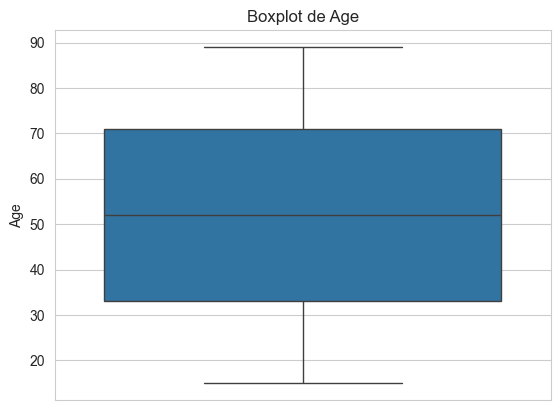

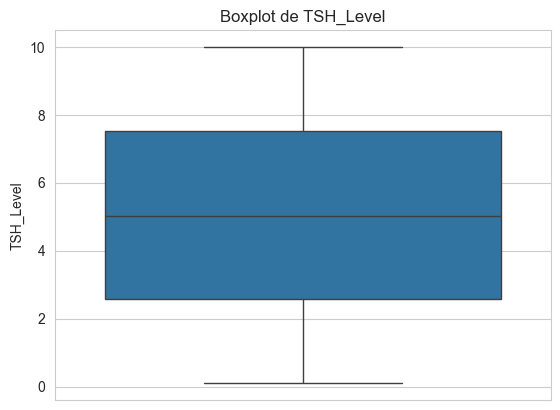

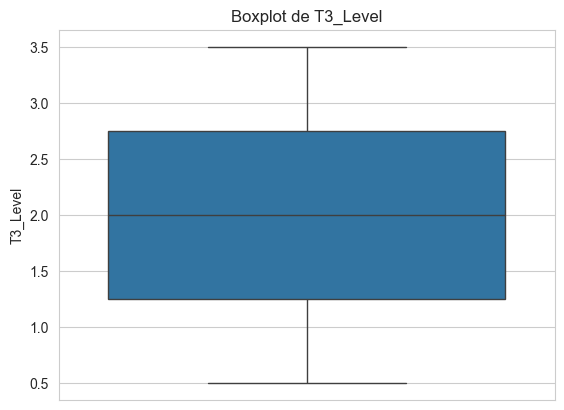

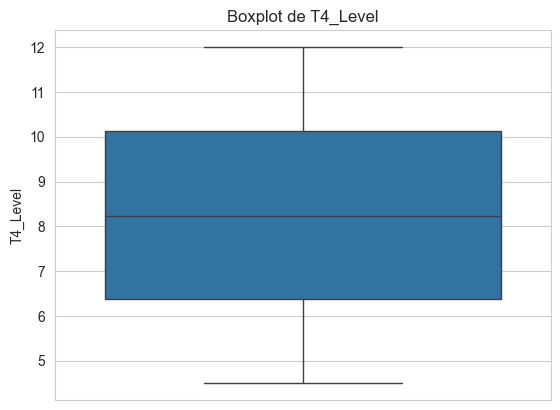

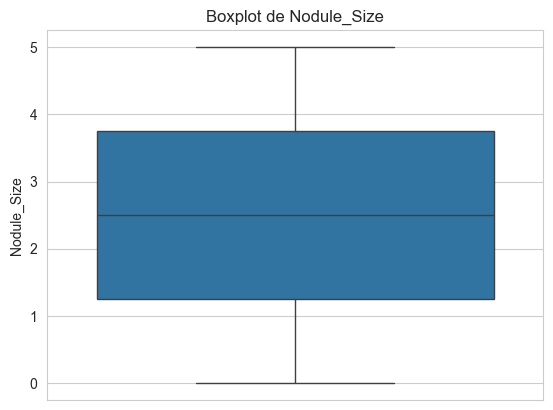

In [16]:
for col in numericas:
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

se realiza lo mismo para las variables categoricas y tambien se realiza el conteo de cada categoria

In [17]:
categoricas = ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
               'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']

Gender
Female    127527
Male       85164
Name: count, dtype: int64


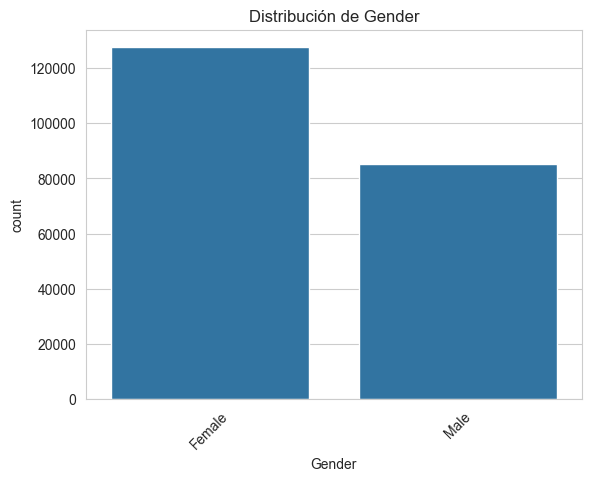

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64


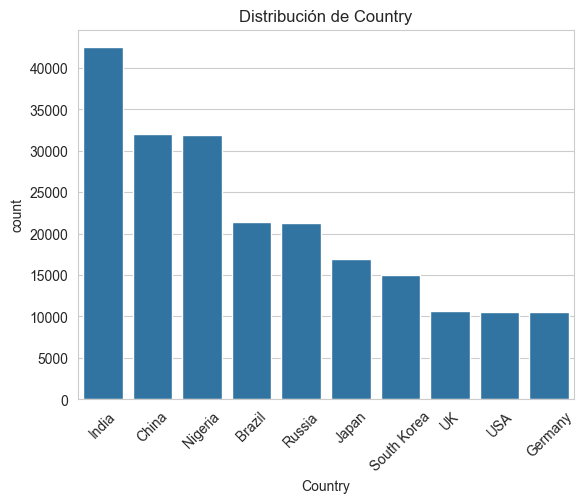

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64


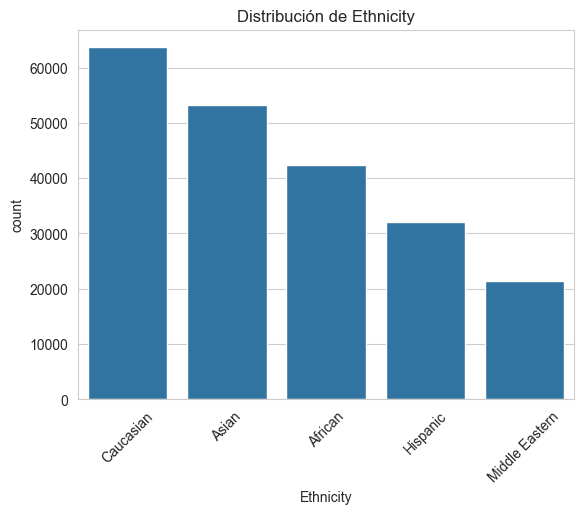

Family_History
No     148866
Yes     63825
Name: count, dtype: int64


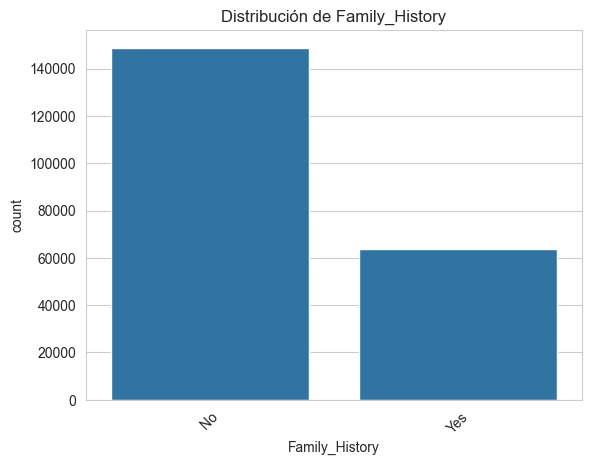

Radiation_Exposure
No     180831
Yes     31860
Name: count, dtype: int64


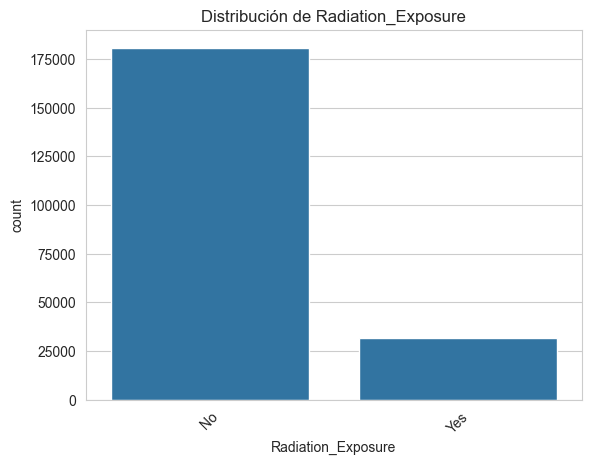

Iodine_Deficiency
No     159673
Yes     53018
Name: count, dtype: int64


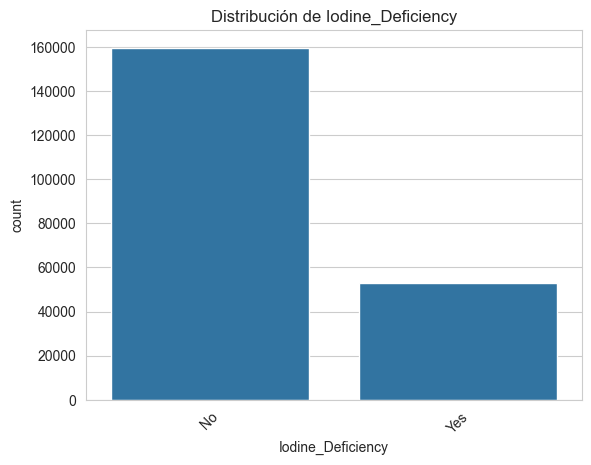

Smoking
No     170260
Yes     42431
Name: count, dtype: int64


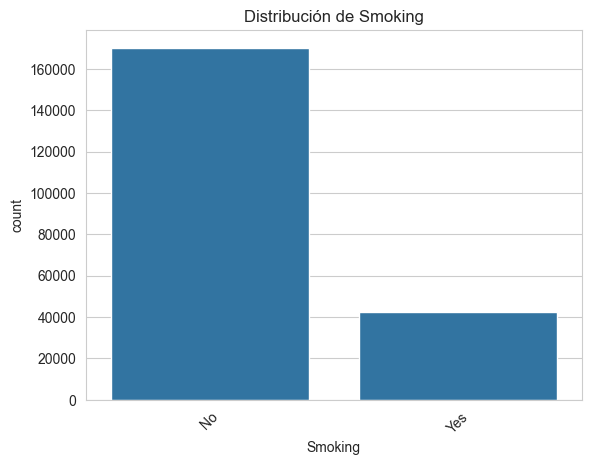

Obesity
No     148805
Yes     63886
Name: count, dtype: int64


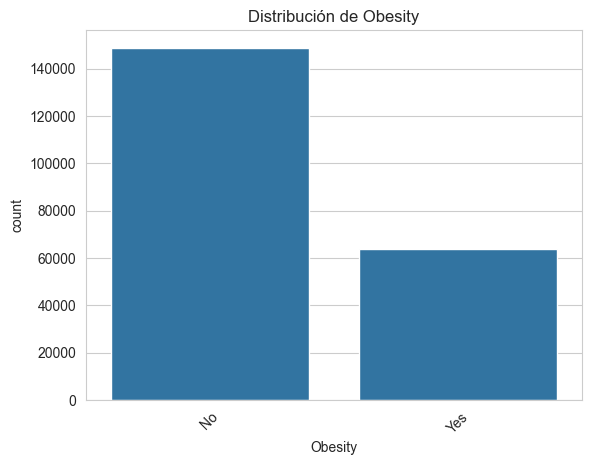

Diabetes
No     170098
Yes     42593
Name: count, dtype: int64


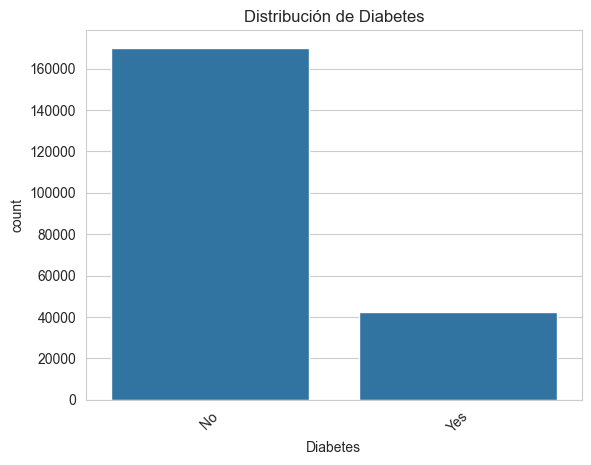

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64


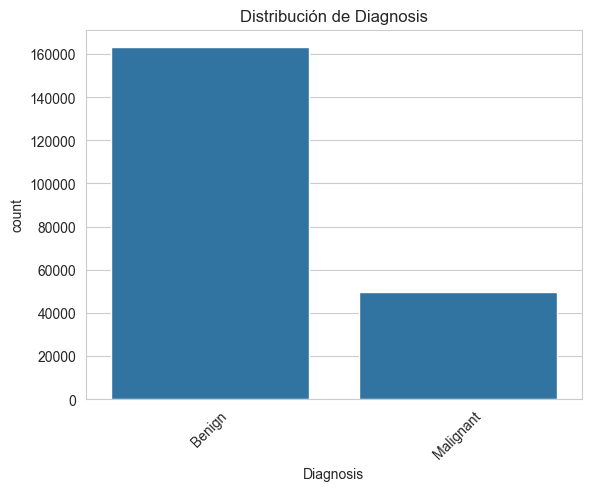

In [18]:
for col in categoricas:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

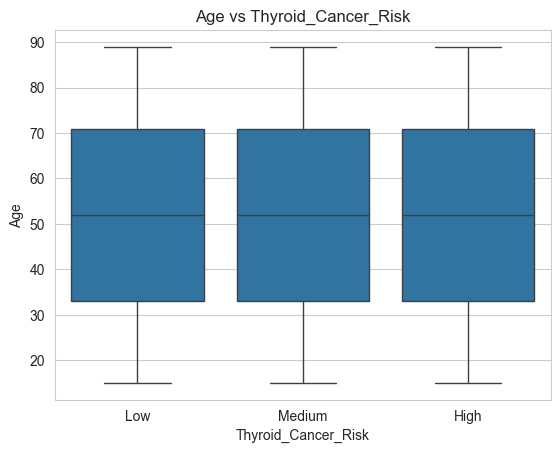

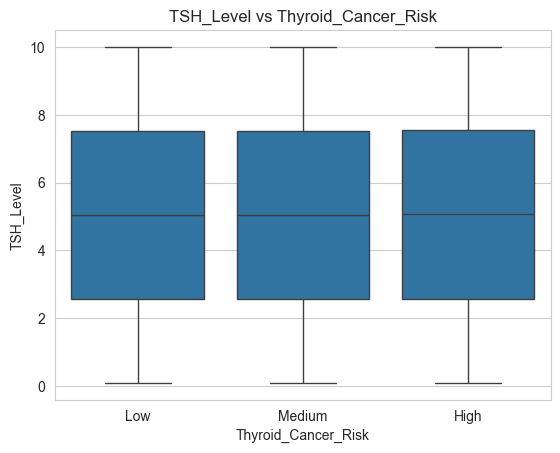

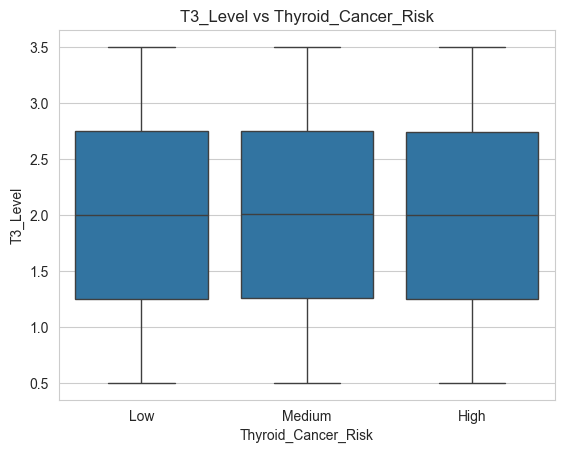

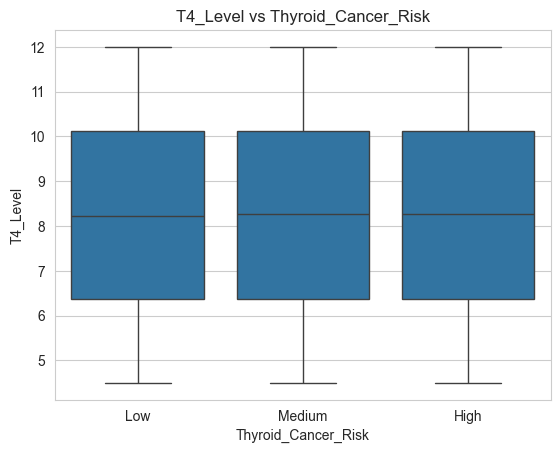

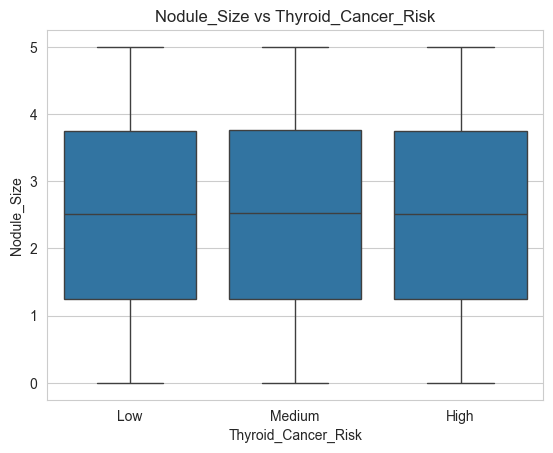

In [19]:
for col in numericas:
    sns.boxplot(data=df, x="Thyroid_Cancer_Risk", y=col, order=['Low', 'Medium', 'High'])
    plt.title(f'{col} vs {"Thyroid_Cancer_Risk"}')
    plt.show()


Se realizan comparaciones entre la variable objetivo y las categoricas y se examina el numero de personas que pertenecen a cada una de las categorias con respecto a las otras variables

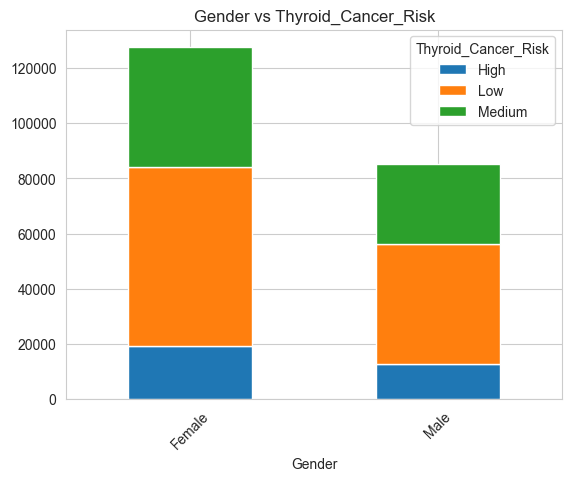

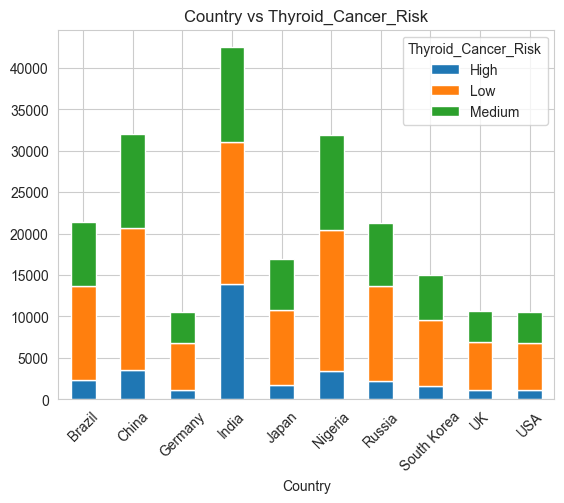

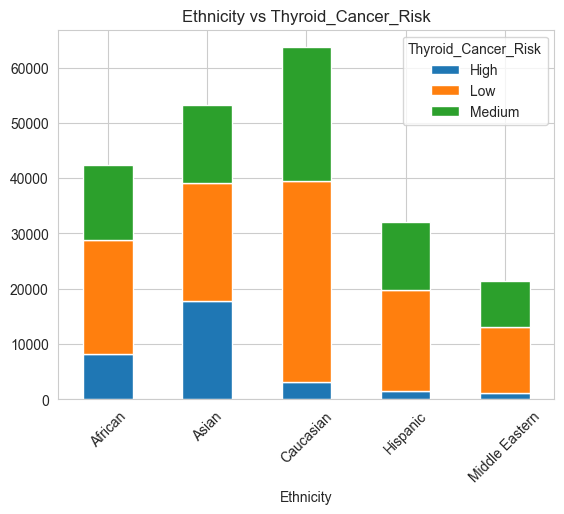

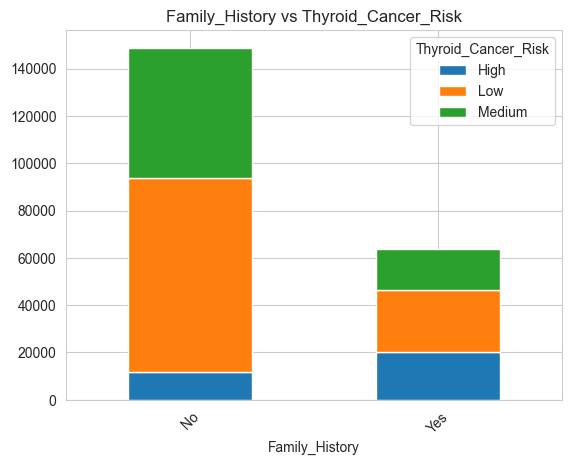

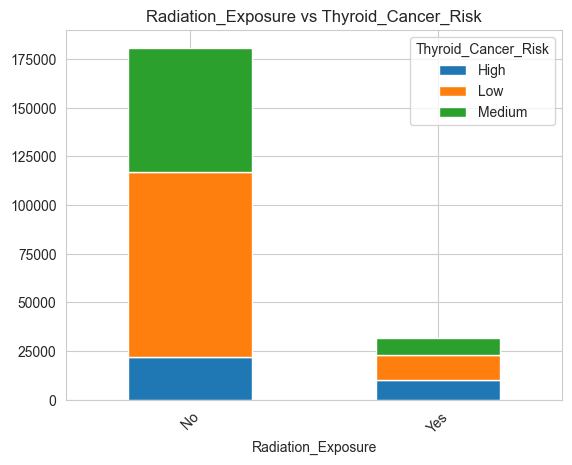

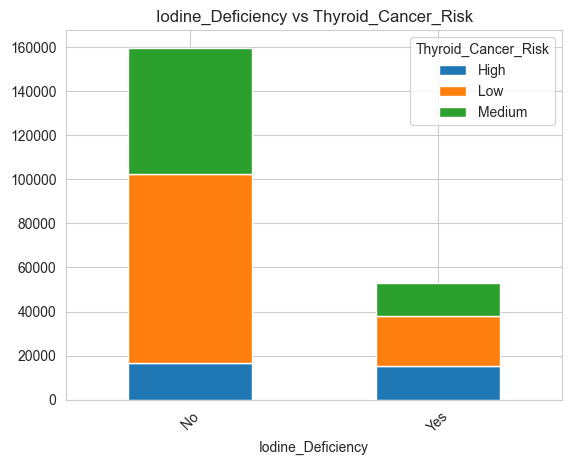

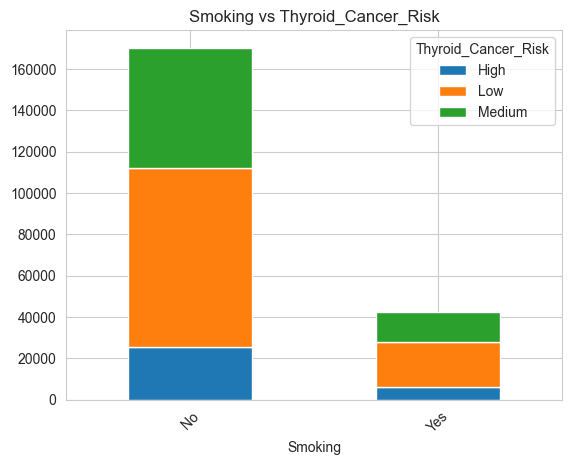

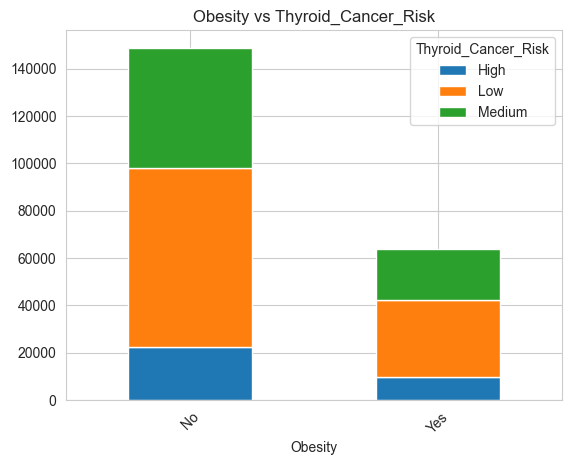

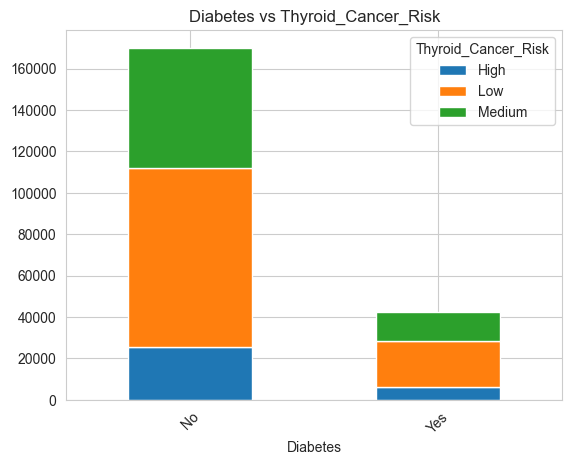

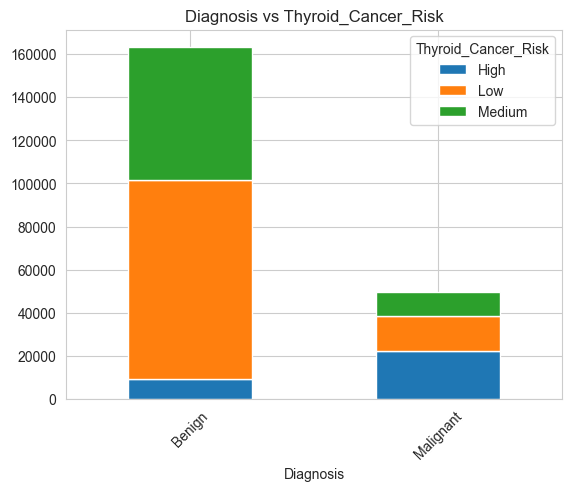

In [20]:
for col in categoricas:
    tabla = pd.crosstab(df[col], df['Thyroid_Cancer_Risk'])
    tabla.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Thyroid_Cancer_Risk')
    plt.xticks(rotation=45)
    plt.show()

codificamos las variables a la hora de analizar multicolinealidad

In [21]:
df_mul = df.copy()
label_encoders = {}

for col in categoricas:
    le = LabelEncoder()
    df_mul[col] = le.fit_transform(df_mul[col])
    label_encoders[col] = le

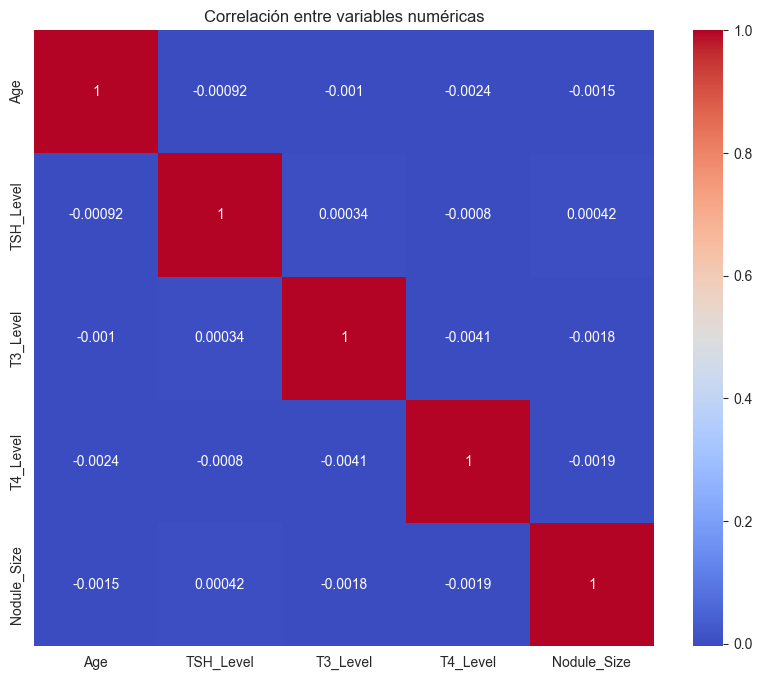

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_mul[numericas].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

In [23]:
X_vif=df_mul[numericas+categoricas]
vif = pd.DataFrame()
vif['Variable'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nValores de VIF:")
print(vif.sort_values('VIF', ascending=False))


Valores de VIF:
              Variable       VIF
3             T4_Level  9.827380
0                  Age  5.771214
2             T3_Level  5.474933
1            TSH_Level  3.790451
4          Nodule_Size  3.694857
6              Country  3.081811
7            Ethnicity  2.795989
5               Gender  1.638779
8       Family_History  1.447540
12             Obesity  1.414951
14           Diagnosis  1.358989
10   Iodine_Deficiency  1.337120
13            Diabetes  1.242565
11             Smoking  1.241434
9   Radiation_Exposure  1.182022


# Evaluacion del dataset mediante regresion logistica

se realizara una evaluacion del dataset reducido para saber si se le puede aplicar machine learning, pero se debe tomar en cuenta que el dataset esta desbalanceado, por lo que se utilizara el parametro class_weight balanced y utilizaremos la regresion logistica multinominal al tener 3 categorias

In [24]:
le_target = LabelEncoder()
df_mul['Thyroid_Cancer_Risk'] = le_target.fit_transform(df_mul['Thyroid_Cancer_Risk'])

In [25]:
X = df_mul.drop(columns=['Thyroid_Cancer_Risk', 'Patient_ID'])
y = df_mul['Thyroid_Cancer_Risk']

In [26]:
scaler = StandardScaler()
X[numericas] = scaler.fit_transform(X[numericas])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

c:\Users\migue\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [29]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5145  644  592]
 [3722 8288 9668]
 [2465 5543 6472]]
              precision    recall  f1-score   support

           0       0.45      0.81      0.58      6381
           1       0.57      0.38      0.46     21678
           2       0.39      0.45      0.41     14480

    accuracy                           0.47     42539
   macro avg       0.47      0.55      0.48     42539
weighted avg       0.49      0.47      0.46     42539

